# Sketch to reality: Data Visualization

In [15]:
import os
import torch, pdb
from torch.utils.data import DataLoader
from torch import nn
from torchvision import transforms
from torchvision.utils import make_grid
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import glob
import numpy as np
import pandas as pd

In [2]:
sketch_path = './Data/data/sketch/tx_000000000000/'

# List of the objects (folders)

list_objects = os.listdir(sketch_path)
list_objects

['apple',
 'cat',
 'rhinoceros',
 'ant',
 'tree',
 'butterfly',
 'sword',
 'pear',
 'strawberry',
 'raccoon',
 'bench',
 'piano',
 'crab',
 'pig',
 'blimp',
 'hammer',
 'hermit_crab',
 'tank',
 'snail',
 'violin',
 'ape',
 'wading_bird',
 'jack-o-lantern',
 'cup',
 '.DS_Store',
 'racket',
 'turtle',
 'hourglass',
 'saw',
 'mushroom',
 'rifle',
 'dog',
 'alarm_clock',
 'bee',
 'couch',
 'dolphin',
 'scorpion',
 'candle',
 'giraffe',
 'bear',
 'flower',
 'harp',
 'penguin',
 'pistol',
 'zebra',
 'sheep',
 'lobster',
 'duck',
 'shoe',
 'trumpet',
 'church',
 'camel',
 'owl',
 'tiger',
 'motorcycle',
 'guitar',
 'chair',
 'windmill',
 'helicopter',
 'starfish',
 'sailboat',
 'wheelchair',
 'seal',
 'jellyfish',
 'cabin',
 'mouse',
 'saxophone',
 'hotdog',
 'lizard',
 'beetle',
 'table',
 'skyscraper',
 'parrot',
 'armor',
 'window',
 'airplane',
 'kangaroo',
 'umbrella',
 'spider',
 'chicken',
 'bell',
 'eyeglasses',
 'spoon',
 'bread',
 'hat',
 'rabbit',
 'scissors',
 'bat',
 'fan',
 'sea

In [3]:
# Select object and see the available files
object0_path = sketch_path + '/' + list_objects[0]

list_sketches_object0 = os.listdir(object0_path)
len(list_sketches_object0)

551

In [4]:
# Doesn't display in Jupyter Notebook, but this library will be used to visualize grids
obj0_sketch0 = Image.open(object0_path + '/' + list_sketches_object0[0])
obj0_sketch0.show()

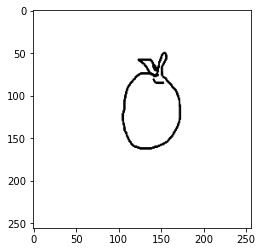

In [5]:
# Display in Notebook
img = mpimg.imread(object0_path + '/' + list_sketches_object0[0])
plt.imshow(img)
plt.show()

In [6]:
# Get all files from all subdirectories to then create batches
# We could have used listdir and for loops
sketch_path = './Data/data/sketch/tx_000000000000/*/*'
list_all_files = []
for file in glob.glob(sketch_path, recursive=True):
    list_all_files.append(file)

len(list_all_files)

75481

## Conversion to tensors

In [7]:
test_sketch_path = list_all_files[0]
test_sketch = Image.open(test_sketch_path)
topil = transforms.ToPILImage()
totensor = transforms.ToTensor()

tensor_sketch = totensor(test_sketch)
tensor_sketch.size() 

torch.Size([3, 256, 256])

This shows that our images are in RGB (3 channels of where values range is [0, 255]): SIZE (channels, width, height)

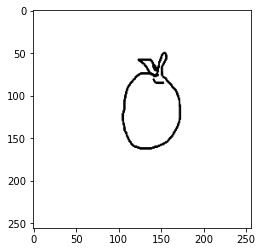

In [8]:
# Visualization
img = topil(tensor_sketch)
plt.imshow(img)

## Create a PyTorch Dataset

In [9]:
import sys
import os
sys.path.insert(0, os.path.abspath('./utils'))
from utils import base_config, build_dataset
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import torch

In [10]:
# Building Dataset structure in a separate folder
# build_dataset.build_sketch_dataset()

In [11]:
def visualize_batch(batch, classes, dataset_type):
	# initialize a figure
	batch_size = base_config.BATCH_SIZE
	n_rows = max(1, batch_size // 4)
	fig, axes = plt.subplots(n_rows, 4, figsize=(batch_size, batch_size))
	fig.suptitle(f"{dataset_type} batch")
	axes = axes.flatten()
	# loop over the batch size
	for i in range(0, base_config.BATCH_SIZE):
		# create a subplot
		ax = axes[i]
		# grab the image, convert it from channels first ordering to
		# channels last ordering, and scale the raw pixel intensities
		# to the range [0, 255]
		image = batch[0][i].cpu().numpy()
		image = image.transpose((1, 2, 0))
		image = (image * 255.0).astype("uint8")
		# grab the label id and get the label from the classes list
		idx = batch[1][i]
		label = classes[idx] # In the DataLoader class
		# show the image along with the label
		ax.imshow(image)
		ax.set_title(label)
		ax.axis("off")
	# show the plot
	plt.tight_layout()
	plt.show()

In [12]:
# initialize our data augmentation functions
resize = transforms.Resize(size=(base_config.INPUT_HEIGHT,
        base_config.INPUT_WIDTH))
hFlip = transforms.RandomHorizontalFlip(p=0.25)
vFlip = transforms.RandomVerticalFlip(p=0.25)
rotate = transforms.RandomRotation(degrees=15)

# initialize our training and validation set data augmentation
# pipeline
trainTransforms = transforms.Compose([resize, hFlip, vFlip, rotate,
        transforms.ToTensor()])
valTransforms = transforms.Compose([resize, transforms.ToTensor()])

In [7]:
# We formatted our data directory to use ImageFolder from torchvision

# initialize the training and validation dataset
print("[INFO] loading the training and validation dataset...")
trainDataset = ImageFolder(root=base_config.TRAIN,
        transform=trainTransforms)
testDataset = ImageFolder(root=base_config.TEST, 
        transform=trainTransforms)
valDataset = ImageFolder(root=base_config.VAL, 
        transform=valTransforms)
print("[INFO] training dataset contains {} samples...".format(
        len(trainDataset)))
print("[INFO] test dataset contains {} samples...".format(
        len(testDataset)))
print("[INFO] validation dataset contains {} samples...".format(
        len(valDataset)))

[INFO] loading the training and validation dataset...
[INFO] training dataset contains 54347 samples...
[INFO] test dataset contains 21134 samples...
[INFO] validation dataset contains 7548 samples...


In [8]:
trainDataset

Dataset ImageFolder
    Number of datapoints: 54347
    Root location: ./Dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.25)
               RandomVerticalFlip(p=0.25)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
           )

In [10]:
# create training and validation set dataloaders
print("[INFO] creating training,test and validation set dataloaders...")
trainDataLoader = DataLoader(trainDataset, 
        batch_size=base_config.BATCH_SIZE, shuffle=True)
testDataLoader = DataLoader(testDataset, 
        batch_size=base_config.BATCH_SIZE, shuffle=True)
valDataLoader = DataLoader(valDataset, batch_size=base_config.BATCH_SIZE)

[INFO] creating training,test and validation set dataloaders...


[INFO] visualizing training and validation batch...


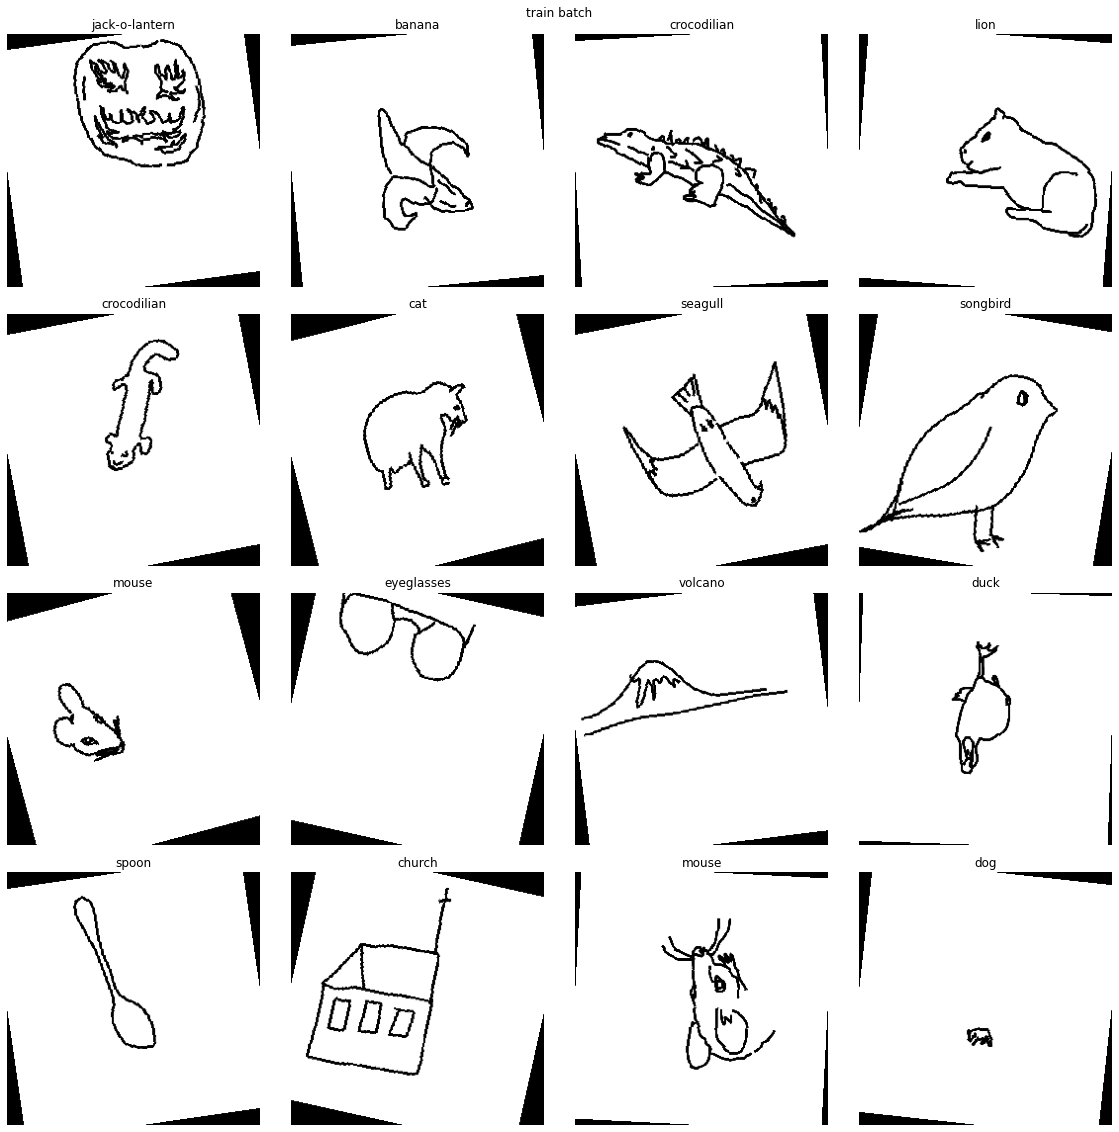

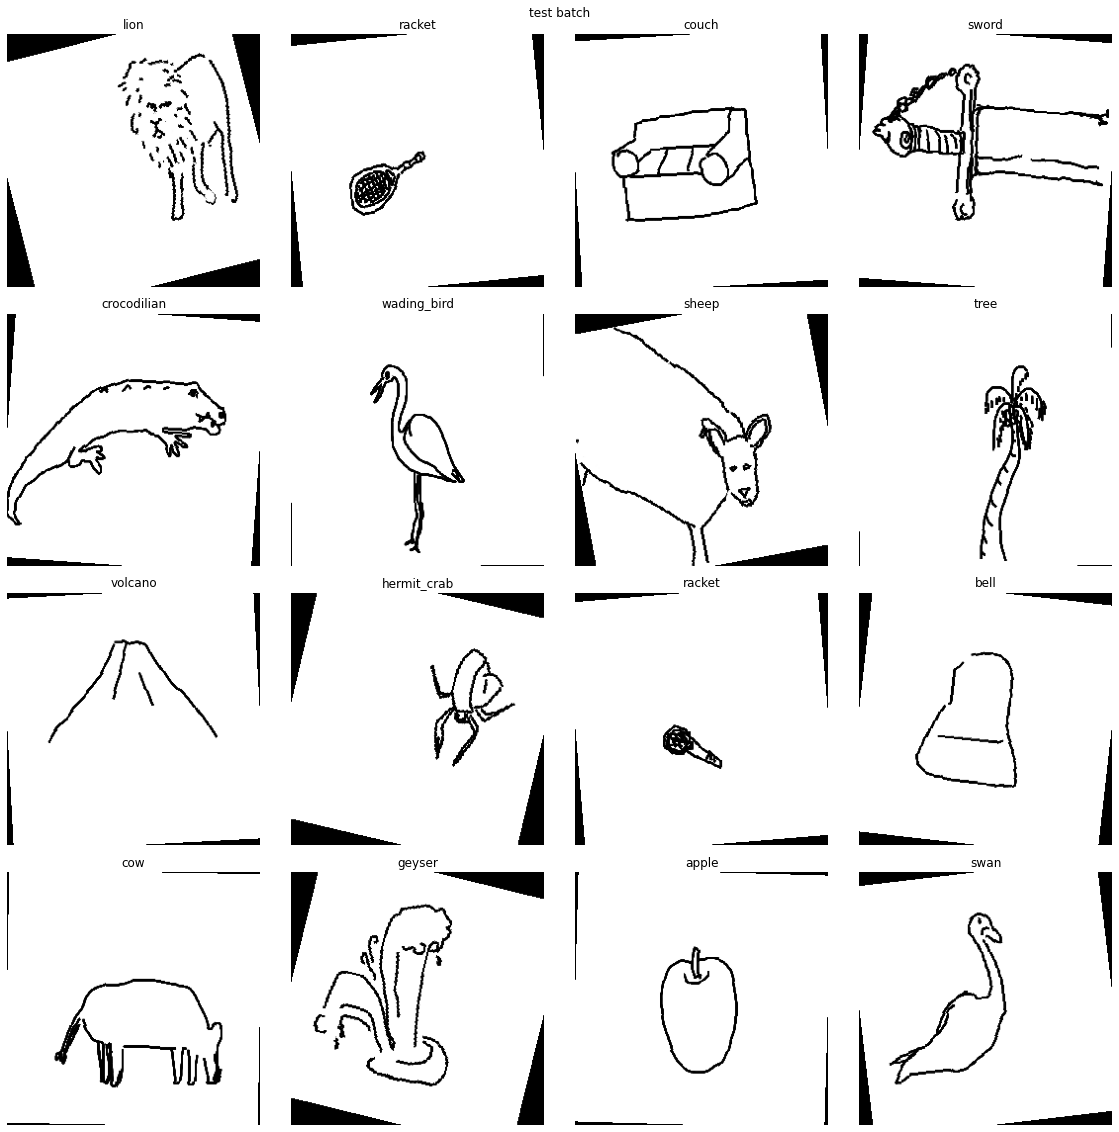

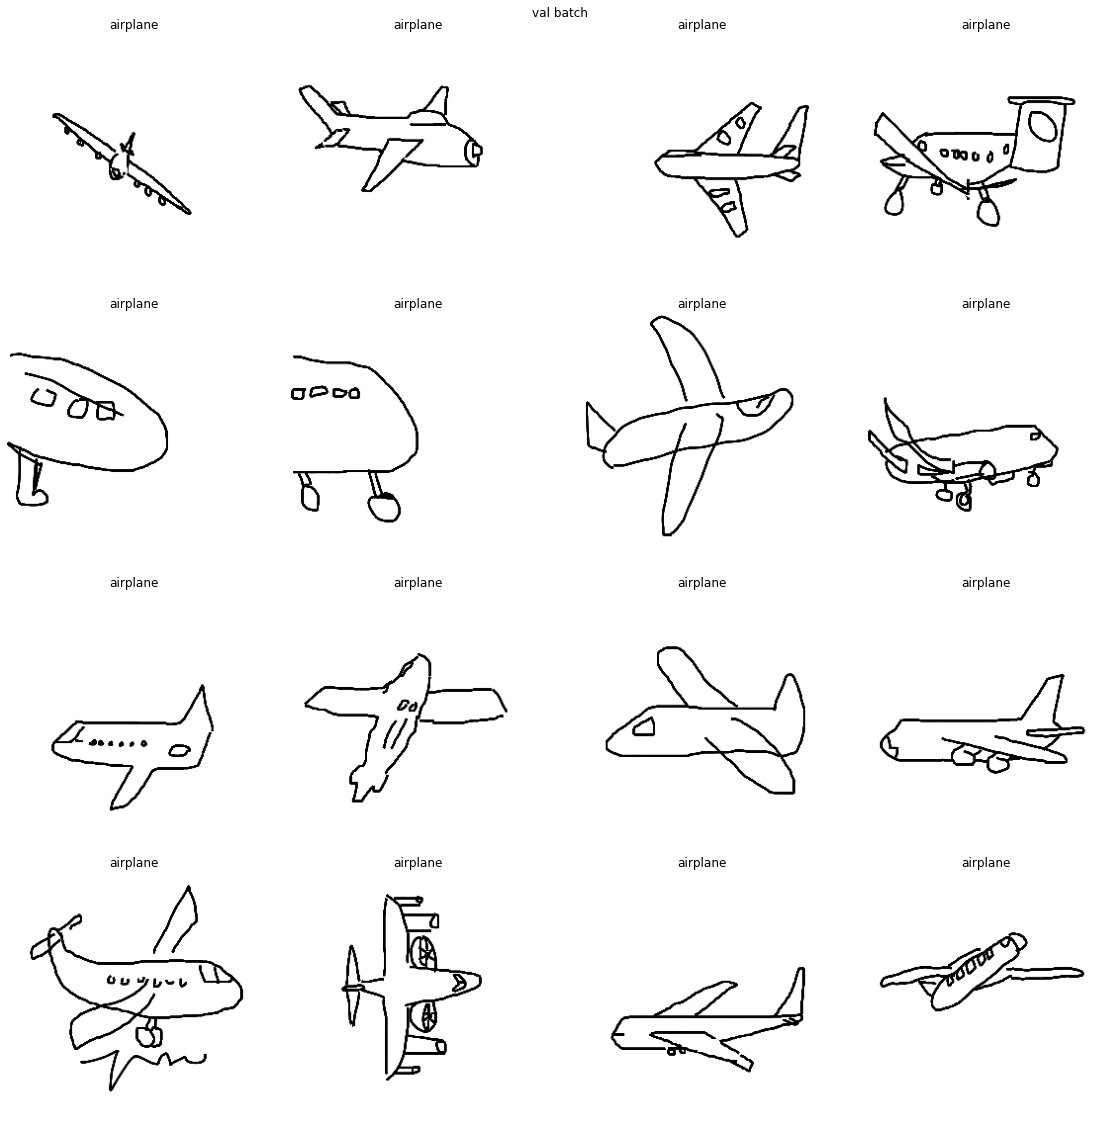

In [11]:
# grab a batch from both training and validation dataloader
trainBatch = next(iter(trainDataLoader))
testBatch = next(iter(testDataLoader))
valBatch = next(iter(valDataLoader))
# visualize the training and validation set batches
print("[INFO] visualizing training and validation batch...")
visualize_batch(trainBatch, trainDataset.classes, "train")
visualize_batch(testBatch, testDataset.classes, "test")
visualize_batch(valBatch, valDataset.classes, "val")

In [21]:
len(trainBatch[0])

16

The functions to create the DataLoaders from the ./Dataset folder are stored in *./utils/create_dataloaders.py*

## Helper functions

We try out functions to transform a batch back into a list of PIL images to feed to the image captioning models (Llava). Most of the functions here are found in image captioning notebooks (it will be cleaned later)

### 1 - Batch to PIL, generating 100 samples for evaluation

In [22]:
def batch_toPILlist(batch, dataset, show_batch = True): # batch is a list of tensors
    topil = transforms.ToPILImage()
    classes = dataset.classes
    PIL_list = []
    labels = []
    for i in range(len(batch[0])):
        image = batch[0][i].cpu().numpy()
        image = image.transpose((1, 2, 0))
        image = (image * 255.0).astype("uint8")
        PILimage = topil(image)
        # grab the label id and get the label from the classes list
        idx = batch[1][i]
        label = classes[idx] # In the DataLoader class
        PIL_list.append(PILimage)
        labels.append(label)

    if show_batch:
        visualize_batch(batch, classes, "")
    return PIL_list, labels


Label jack-o-lantern


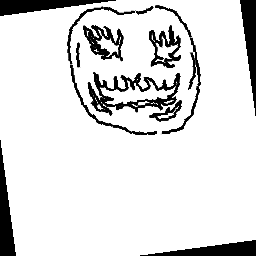


Label banana


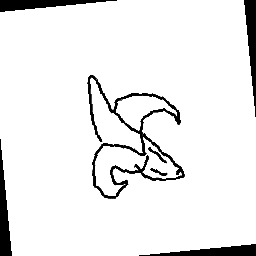


Label crocodilian


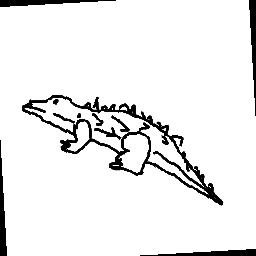


Label lion


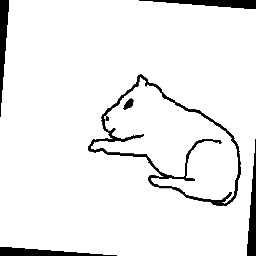


Label crocodilian


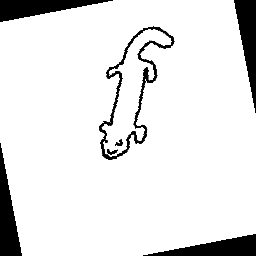


Label cat


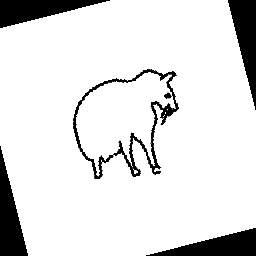


Label seagull


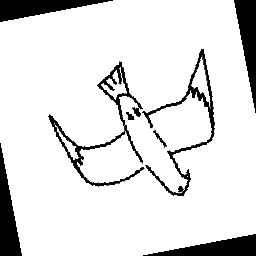


Label songbird


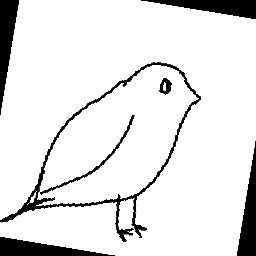


Label mouse


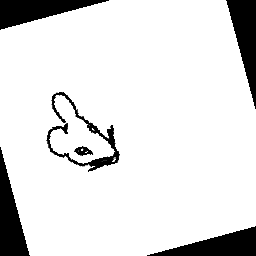


Label eyeglasses


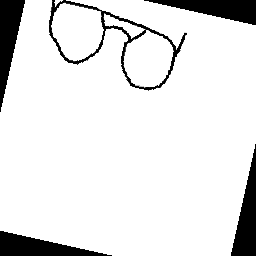


Label volcano


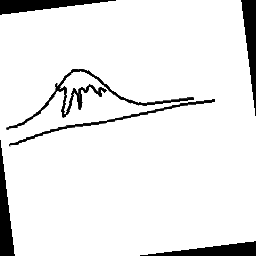


Label duck


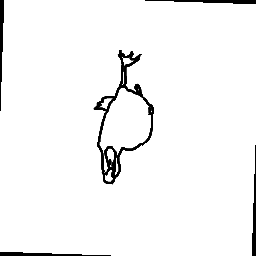


Label spoon


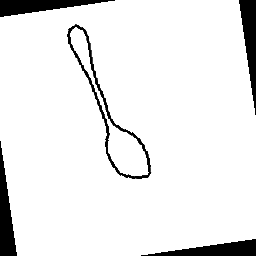


Label church


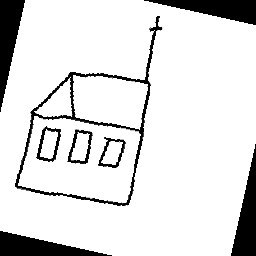


Label mouse


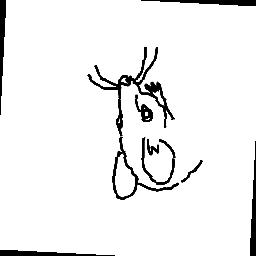


Label dog


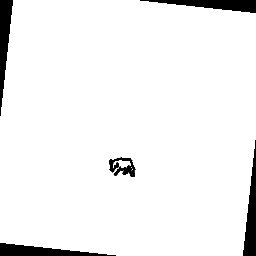

In [27]:
l, lab = batch_toPILlist(trainBatch, trainDataset, show_batch=False)
length = len(l)
for i in range(length):
    im = l[i]
    label = lab[i]
    print(f'\nLabel {label}')
    display(im)

In [14]:
# Creating a subset of sketchy to evaluate the captioning models on the same captions

# get list of all files
sketch_path = './Data/data/sketch/tx_000000000000/*/*'
list_all_files = []
for file in glob.glob(sketch_path, recursive=True):
    list_all_files.append(file)

length_dataset = len(list_all_files)

In [23]:
n_samples = 100
eval_dict = {'path': [], 'label': []}

for i in range(n_samples):
    sample = np.random.randint(0, length_dataset)
    eval_dict['path'].append(list_all_files[sample])
    eval_dict['label'].append(list_all_files[sample].split('/')[-2])

eval_df = pd.DataFrame.from_dict(eval_dict)
eval_df.head

<bound method NDFrame.head of                                                  path        label
0   ./Data/data/sketch/tx_000000000000/car_(sedan)...  car_(sedan)
1   ./Data/data/sketch/tx_000000000000/bicycle/n03...      bicycle
2   ./Data/data/sketch/tx_000000000000/ape/n024804...          ape
3   ./Data/data/sketch/tx_000000000000/racket/n040...       racket
4   ./Data/data/sketch/tx_000000000000/windmill/n0...     windmill
..                                                ...          ...
95  ./Data/data/sketch/tx_000000000000/sword/n0437...        sword
96  ./Data/data/sketch/tx_000000000000/bicycle/n02...      bicycle
97  ./Data/data/sketch/tx_000000000000/airplane/n0...     airplane
98  ./Data/data/sketch/tx_000000000000/duck/n01846...         duck
99  ./Data/data/sketch/tx_000000000000/mouse/n0233...        mouse

[100 rows x 2 columns]>

In [28]:
def dataframe_toPILlist(df, show_img = False):
    image_list = []
    label_list = []
    for i in range(df.shape[0]):
        row = df.iloc[i]
        path = row['path']
        lab = row['label']

        img = Image.open(path)
        image_list.append(img)
        label_list.append(lab)

        if show_img:
            print(f'\nLabel {lab}')
            display(img)

    return image_list, label_list


Label car_(sedan)


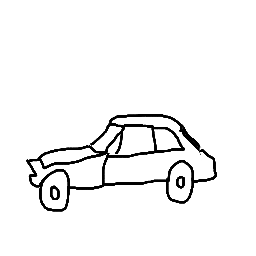


Label bicycle


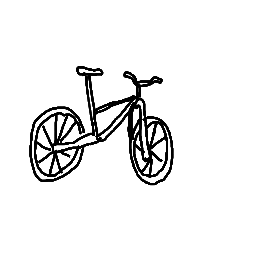


Label ape


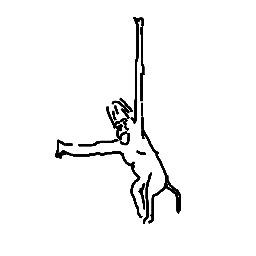


Label racket


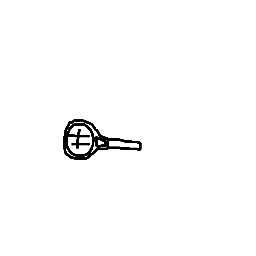


Label windmill


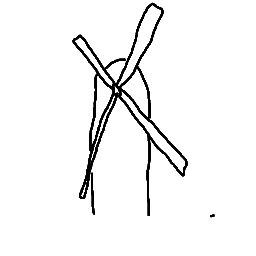


Label rifle


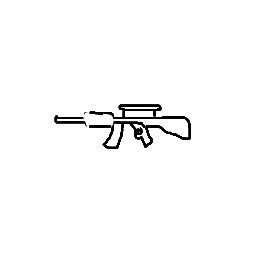


Label dolphin


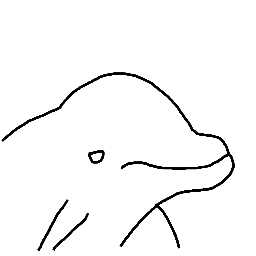


Label fan


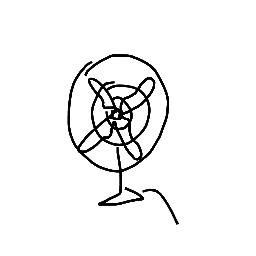


Label giraffe


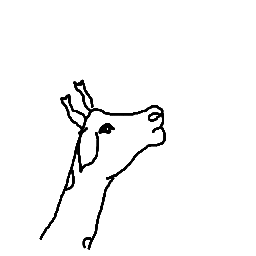


Label cat


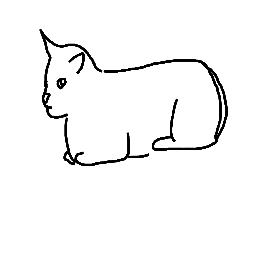


Label cat


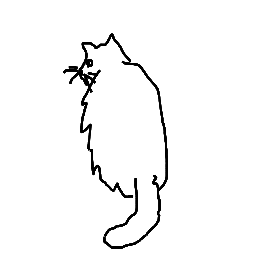


Label violin


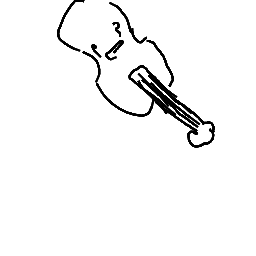


Label pretzel


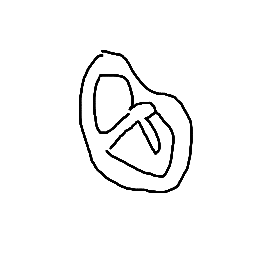


Label teddy_bear


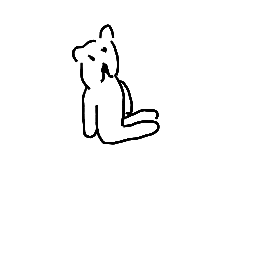


Label sword


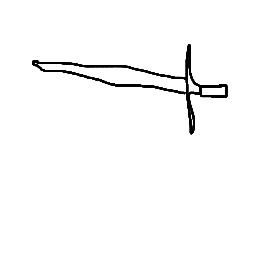


Label dog


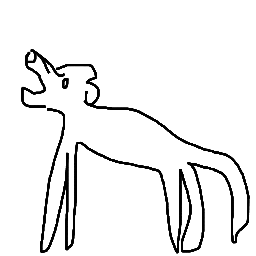


Label castle


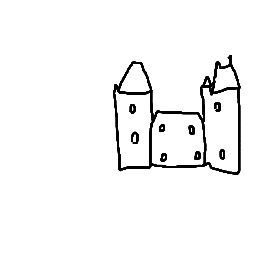


Label hamburger


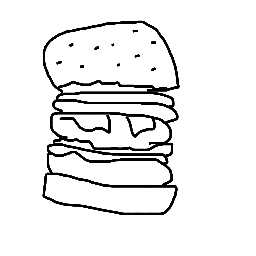


Label frog


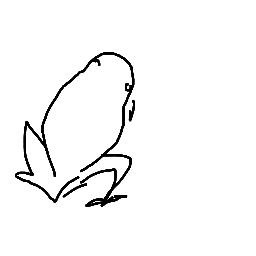


Label hamburger


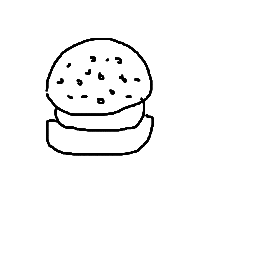


Label hat


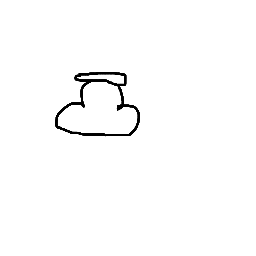


Label crab


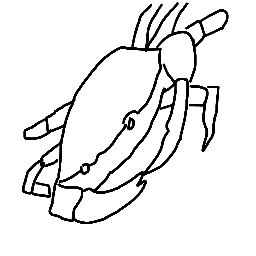


Label raccoon


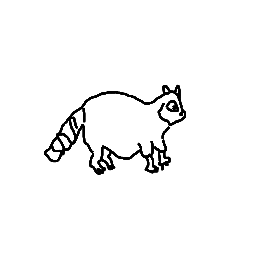


Label alarm_clock


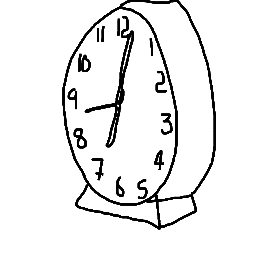


Label candle


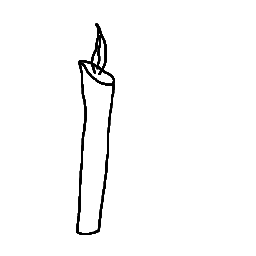


Label bell


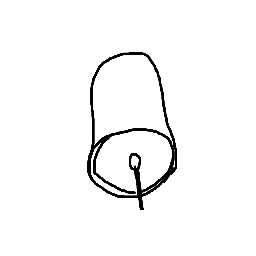


Label helicopter


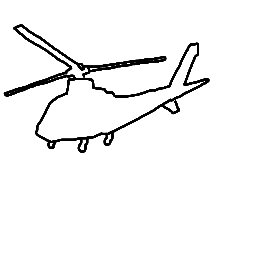


Label raccoon


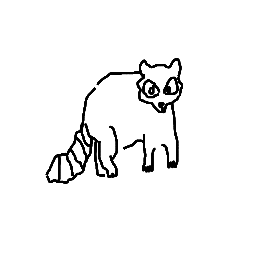


Label banana


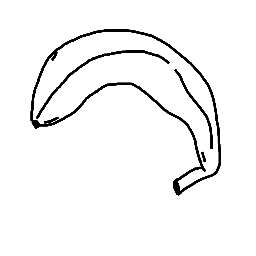


Label cow


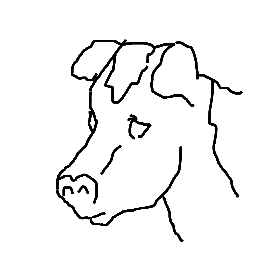


Label duck


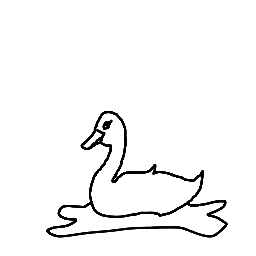


Label window


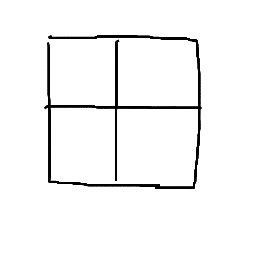


Label blimp


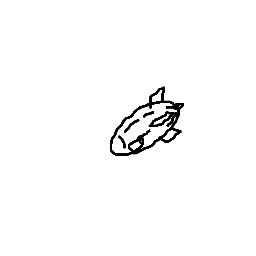


Label alarm_clock


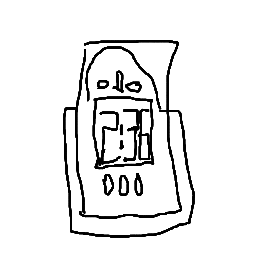


Label rhinoceros


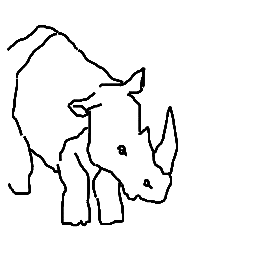


Label trumpet


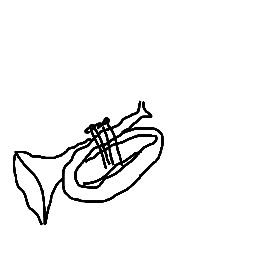


Label armor


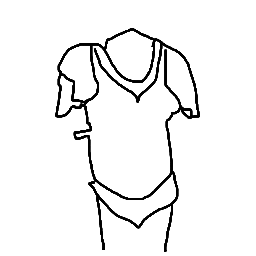


Label ant


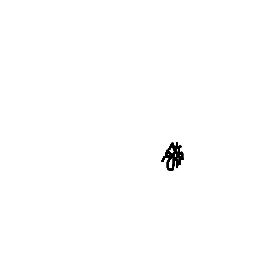


Label snail


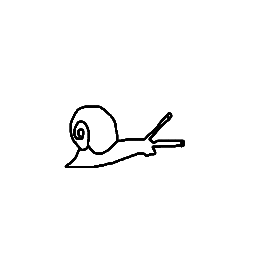


Label jellyfish


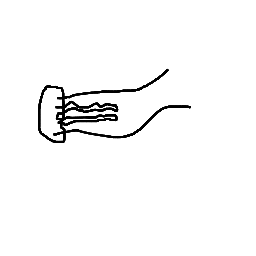


Label deer


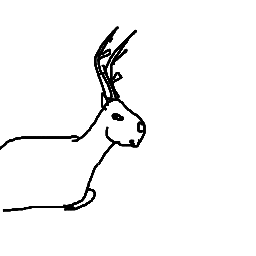


Label tree


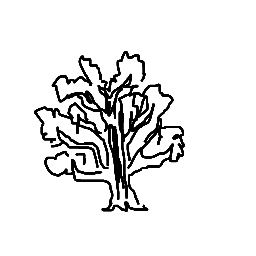


Label bench


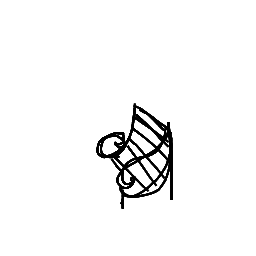


Label wheelchair


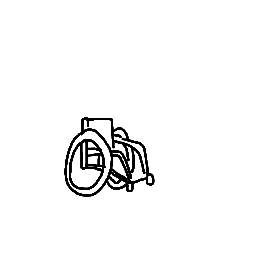


Label fan


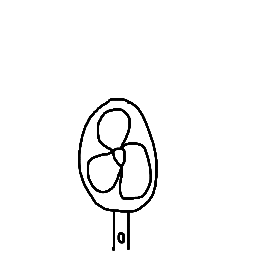


Label strawberry


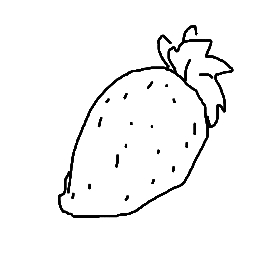


Label shark


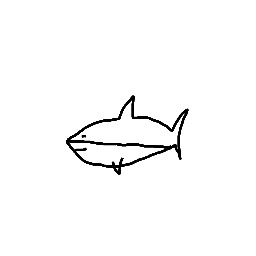


Label duck


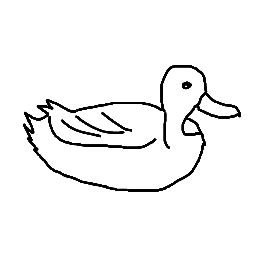


Label candle


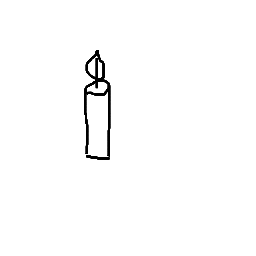


Label deer


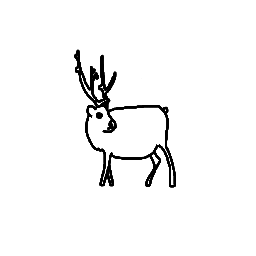


Label pretzel


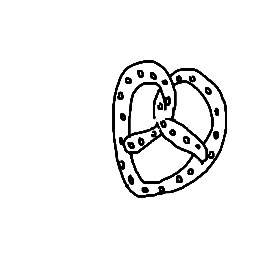


Label scorpion


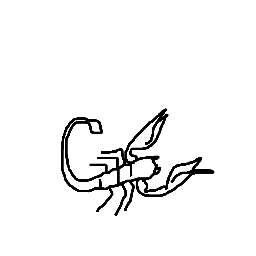


Label bear


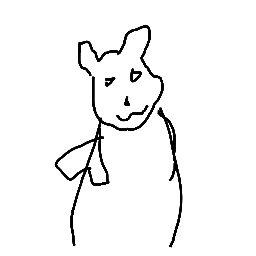


Label cannon


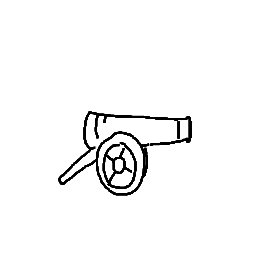


Label helicopter


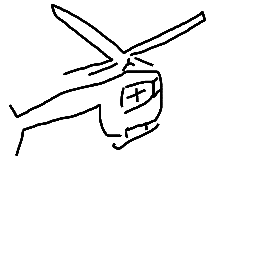


Label pineapple


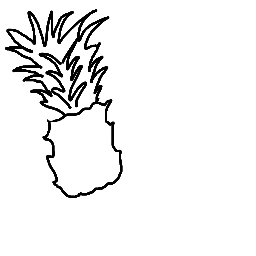


Label ape


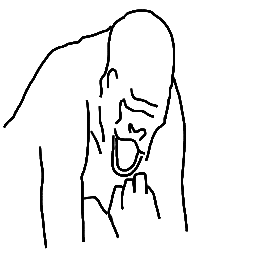


Label hedgehog


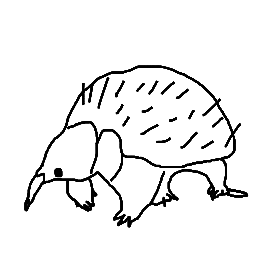


Label snake


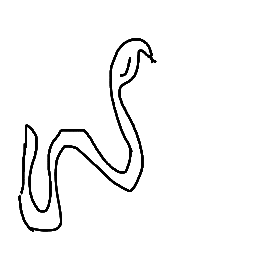


Label umbrella


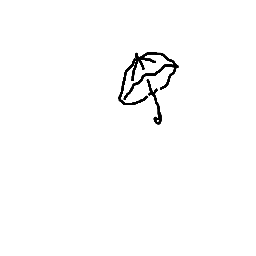


Label windmill


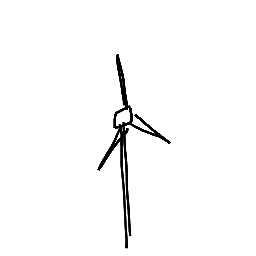


Label hamburger


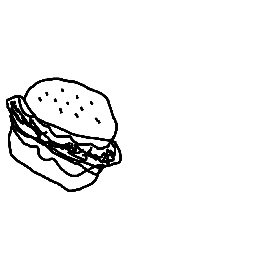


Label piano


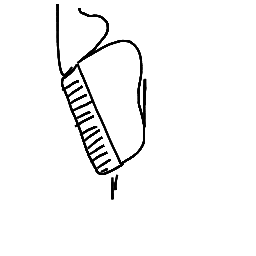


Label duck


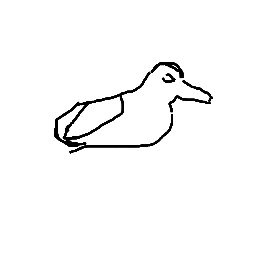


Label camel


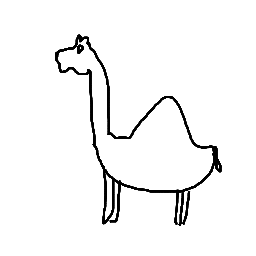


Label bicycle


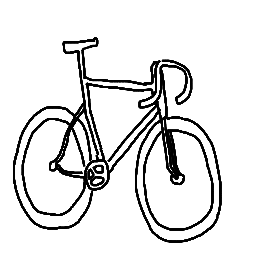


Label church


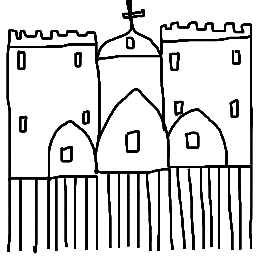


Label shoe


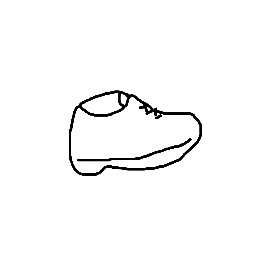


Label skyscraper


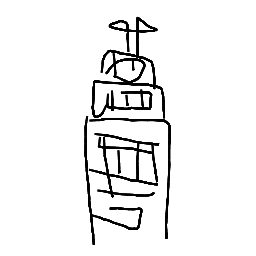


Label geyser


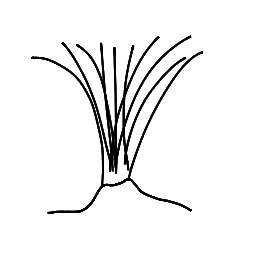


Label fan


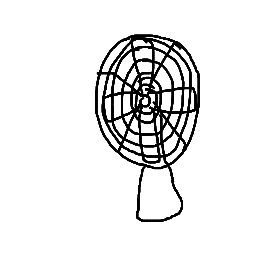


Label butterfly


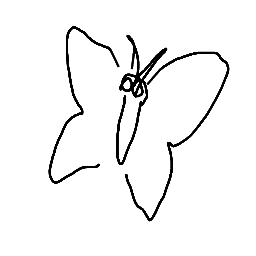


Label deer


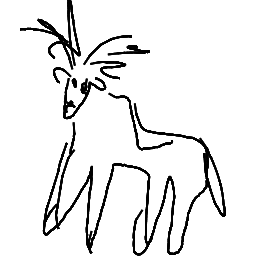


Label chair


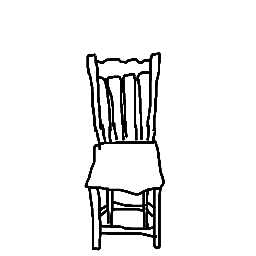


Label windmill


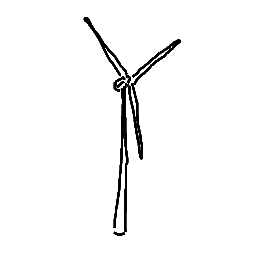


Label squirrel


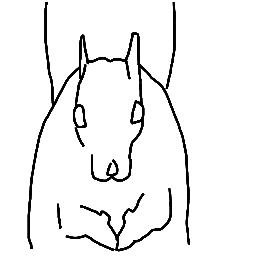


Label jellyfish


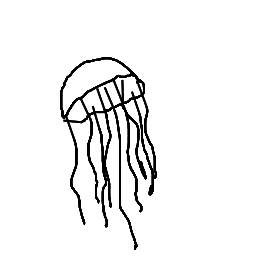


Label flower


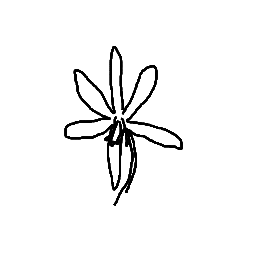


Label apple


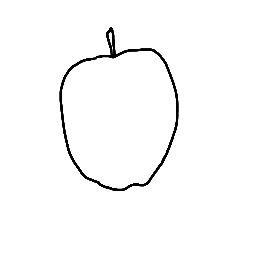


Label sword


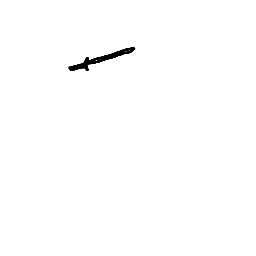


Label sword


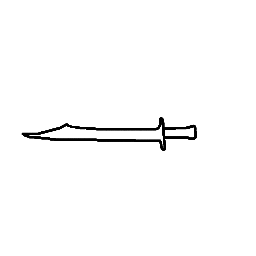


Label banana


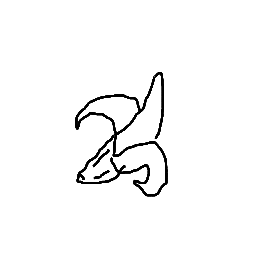


Label motorcycle


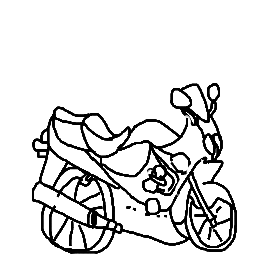


Label squirrel


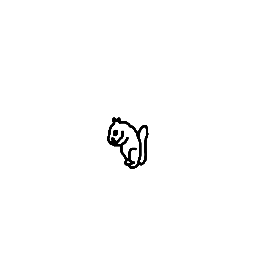


Label sailboat


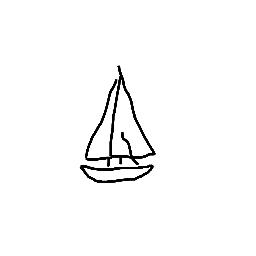


Label hot-air_balloon


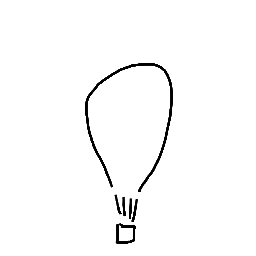


Label ray


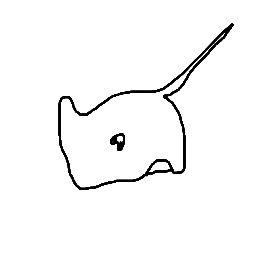


Label butterfly


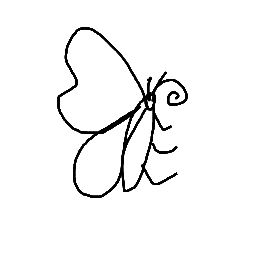


Label bell


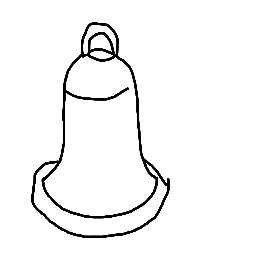


Label owl


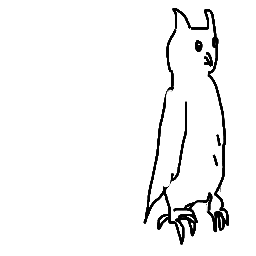


Label banana


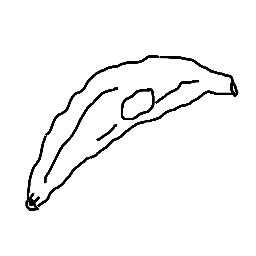


Label tree


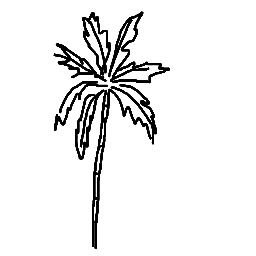


Label starfish


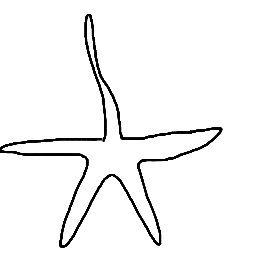


Label pig


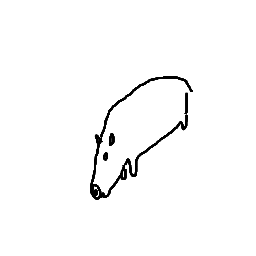


Label bench


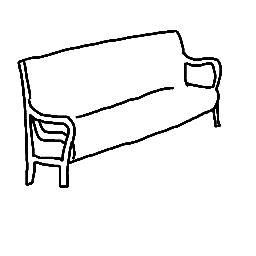


Label sword


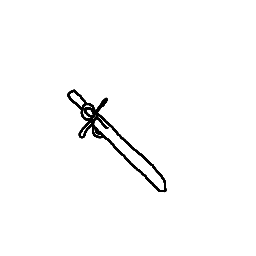


Label bicycle


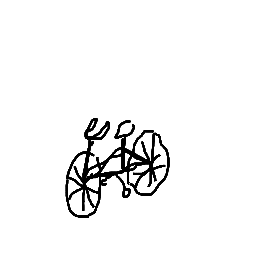


Label airplane


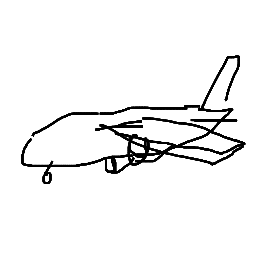


Label duck


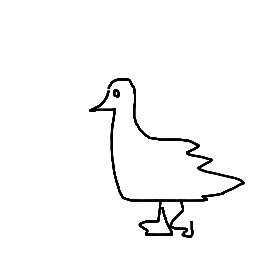


Label mouse


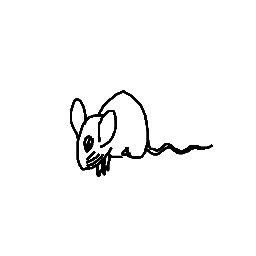

In [29]:
a, b = dataframe_toPILlist(eval_df, show_img=True)

In [30]:
eval_df.to_csv('./Data/data/sketch/eval_image_captioning.csv')

### 2 - Saving model's answer

In [8]:
import pandas as pd
import os

In [16]:
def save_prompt_answer(imgs_name, label_list, prompt_list, answer_list, path = './test.csv'):
    try:
        folder_path = path.split('/')[-2]
    except:
        print('Invalid path to save data')
        return None
    
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    df_dict = {'ImageName': imgs_name, "Labels": label_list, "Prompts": prompt_list, 'Answers':answer_list}
    df = pd.DataFrame.from_dict(df_dict)
    df.to_csv(path, index=False)
    print(f'Saved answers at {path}')
    return df

In [17]:
imgs = ["01", "02"]
label_list = ["cow", "acropolis"]
prompt_list = ["What is drawn ?", "What is drawn ?"]
answer_list = ["This is an cow", "This is an acropolis"]

df_answers = save_prompt_answer(imgs, label_list, prompt_list, answer_list, path = './results/test.csv')

Saved answers at ./results/test.csv


In [19]:
test_results = pd.read_csv('./results/test.csv')
print(test_results.columns)

# Fetching back answers only for stable diffusions
test_results["Answers"]

Index(['ImageName', 'Labels', 'Prompts', 'Answers'], dtype='object')


0          This is an cow
1    This is an acropolis
Name: Answers, dtype: object